In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read dataset and display columns

In [4]:
df=pd.read_csv('cruise_ship_info.csv')

### Exploratory Data Analysis

In [5]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


##### This is a supervised learning problem since both target and feature are known to us.
##### We independent  variables Ship_name,Cruise_line,age, tonnage, passengers, length, cabins and passenger_density and dependent variable is crew .how the independent variables influence the number of crew on board we will find out.
##### The target variable is continuous so this is falls under Regression.We have to find out the cousal effect relationship,Since regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable.

In [6]:
df.tail()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88
157,Surf,Windstar,23,14.745,3.08,6.17,1.56,47.87,1.80


#### Random sampling

In [7]:
df.sample(5)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
87,Insignia,Oceania,15,30.277,6.84,5.94,3.42,44.26,4.00
35,Atlantica,Costa,13,85.619,21.14,9.57,10.56,40.50,9.20
149,Aries,Star,22,3.341,0.66,2.80,0.33,50.62,0.59
70,Musica,MSC,7,89.600,25.50,9.61,12.75,35.14,9.87
73,Sinfonia,MSC,11,58.600,15.66,8.23,7.83,37.42,7.60


### Checking how many rows and how many columns present in my dataset

In [8]:
df.shape

(158, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


###  Calculate basic statistics of the data

In [10]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### Checking the data type of each column

In [11]:
df.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
passengers           float64
length               float64
cabins               float64
passenger_density    float64
crew                 float64
dtype: object

### counts of unique values present in Ship_name attribute

In [12]:
df['Ship_name'].value_counts()

Spirit          4
Legend          3
Star            3
Sea             2
Sun             2
               ..
Quest           1
Vision          1
Victory         1
Mediterranea    1
Artemis         1
Name: Ship_name, Length: 138, dtype: int64

In [13]:
df['Ship_name'].unique()

array(['Journey', 'Quest', 'Celebration', 'Conquest', 'Destiny',
       'Ecstasy', 'Elation', 'Fantasy', 'Fascination', 'Freedom', 'Glory',
       'Holiday', 'Imagination', 'Inspiration', 'Legend', 'Liberty*',
       'Miracle', 'Paradise', 'Pride', 'Sensation', 'Spirit', 'Triumph',
       'Valor', 'Victory', 'Century', 'Constellation', 'Galaxy',
       'Infinity', 'Mercury', 'Millenium', 'Solstice', 'Summit',
       'Xpedition', 'Zenith', 'Allegra', 'Atlantica', 'Classica',
       'Europa', 'Fortuna', 'Magica', 'Marina', 'Mediterranea',
       'Romantica', 'Serena', 'Victoria', 'Serenity', 'Symphony',
       'QueenElizabethII', 'QueenMary2', 'QueenVictoria', 'Magic',
       'Wonder', 'Amsterdam', 'Eurodam', 'Maasdam', 'Noordam',
       'Oosterdam', 'Prinsendam', 'Rotterdam', 'Ryndam', 'Statendam',
       'Veendam', 'Volendam', 'Westerdam', 'Zaandam', 'Zuiderdam',
       'Armonia', 'Fantasia', 'Lirica', 'Melody', 'Musica', 'Opera',
       'Rhapsody', 'Sinfonia', 'Crown', 'Dawn', 'Dream'

In [14]:
df['Ship_name'].nunique()

138

### counts of unique values present in Cruise_line attribute

In [15]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
P&O                   6
Star                  6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Cunard                3
Windstar              3
Seabourn              3
Disney                2
Azamara               2
Crystal               2
Orient                1
Name: Cruise_line, dtype: int64

### Analyzing duplicate values

In [16]:
df.duplicated().sum()

0

### Checking Any missing values present in the data set or not

In [17]:
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [18]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

### Data visualization

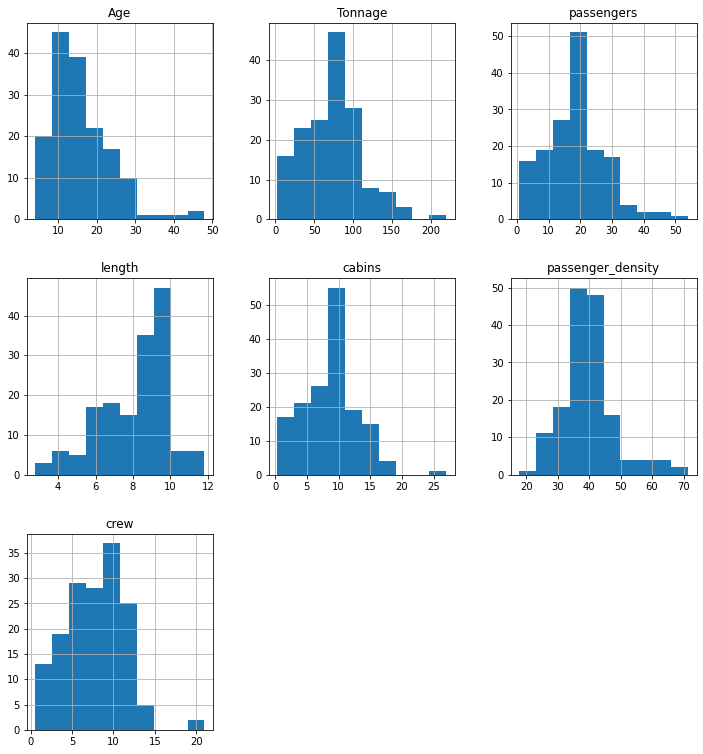

In [19]:
df.hist(bins=10,figsize=(12,13))
plt.show()

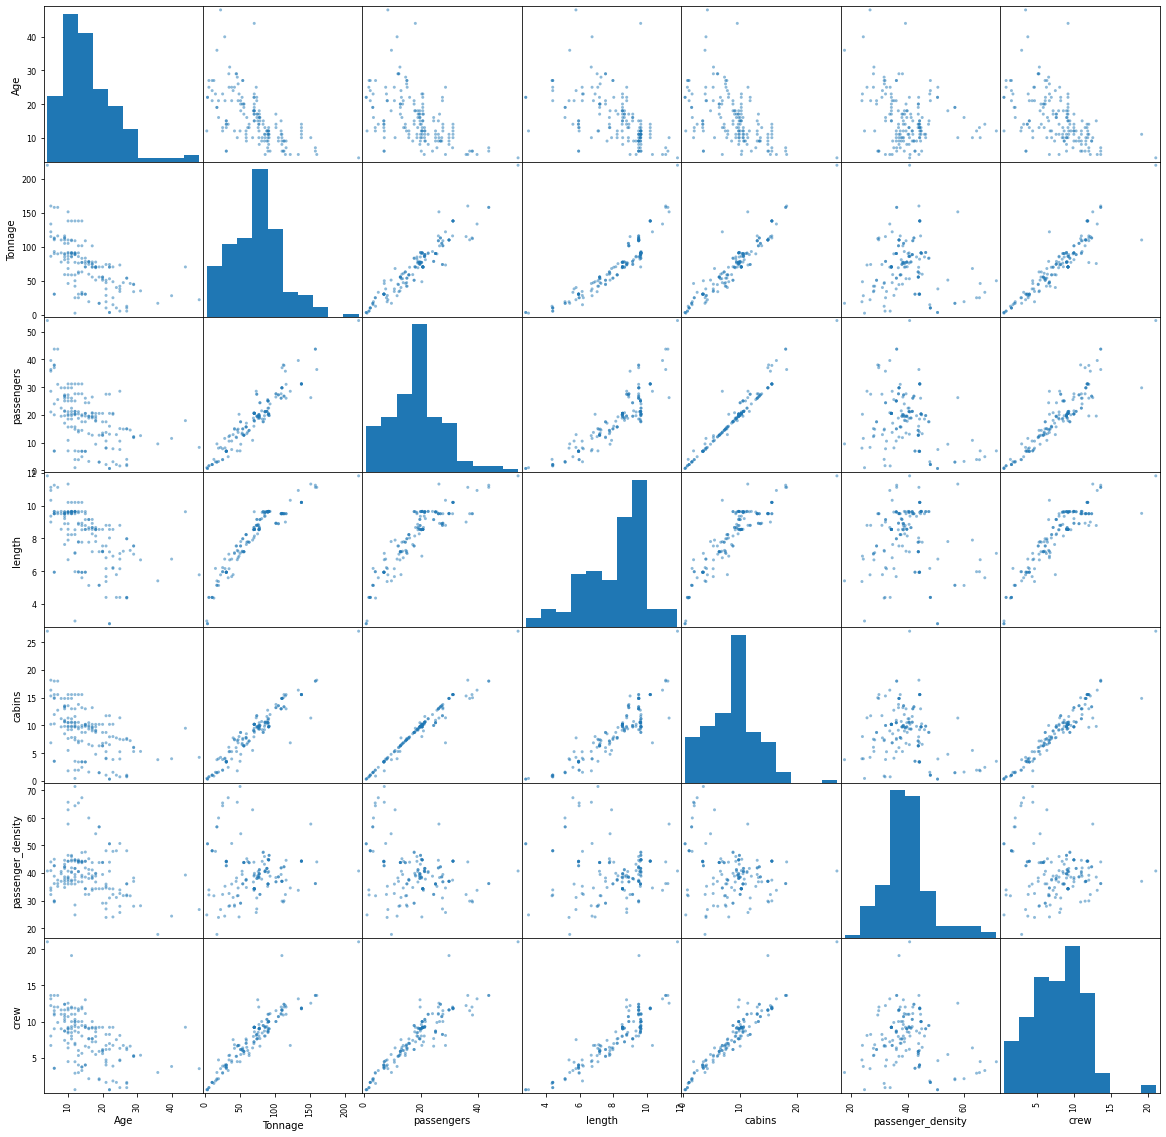

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));

### Correlation Analysis

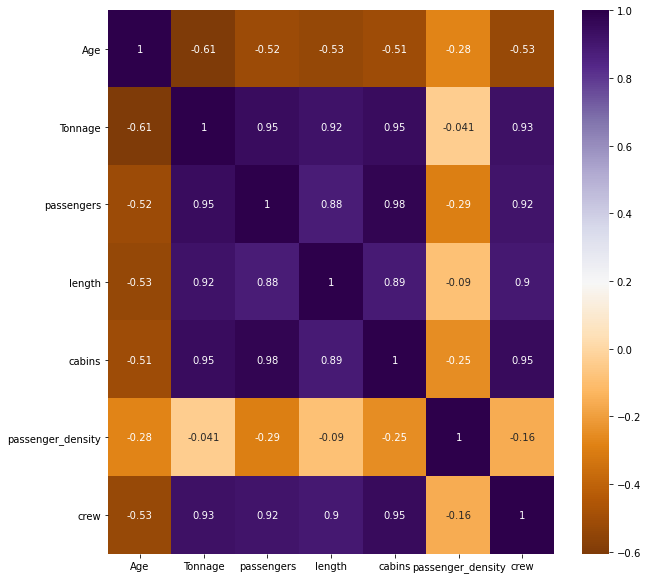

In [21]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

#Heat Map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='PuOr')

##### We observe that variables are on different scales, for sample the Age variable ranges from about 4 years to 48 years, while the Tonnage variable ranges from 2 to 220. It is therefore important that when a regression model is built using these variables, variables be brought to same scale either by standardizing or normalizing the data.

##### From the covariance matrix plot above We also observe that the target variable 'crew' correlates well with 4 predictor variables - 'Tonnage', 'passengers', 'length', and 'cabins'.

In [22]:
df=df.drop(['passenger_density','Ship_name'],axis=1)

In [23]:
df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,crew
0,Azamara,6,30.277,6.94,5.94,3.55,3.55
1,Azamara,6,30.277,6.94,5.94,3.55,3.55
2,Carnival,26,47.262,14.86,7.22,7.43,6.70
3,Carnival,11,110.000,29.74,9.53,14.88,19.10
4,Carnival,17,101.353,26.42,8.92,13.21,10.00


### Handling Categorical Data 

In [24]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
P&O                   6
Star                  6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Cunard                3
Windstar              3
Seabourn              3
Disney                2
Azamara               2
Crystal               2
Orient                1
Name: Cruise_line, dtype: int64

In [25]:
counts=df['Cruise_line'].value_counts()

In [26]:
df['Cruise_line'].nunique()
threshold=6

In [27]:
repl=counts[counts <= threshold].index

In [28]:
dummies=pd.get_dummies(df['Cruise_line'].replace(repl,'uncommon'),drop_first=True)
dummies

,Celebrity,Costa,Holland_American,MSC,Norwegian,Princess,Royal_Caribbean,uncommon
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,1
154,0,0,0,0,0,0,0,1
155,0,0,0,0,0,0,0,1
156,0,0,0,0,0,0,0,1


In [29]:
df=pd.concat([df,dummies],axis='columns')
df.head()

,Cruise_line,Age,Tonnage,passengers,length,cabins,crew,Celebrity,Costa,Holland_American,MSC,Norwegian,Princess,Royal_Caribbean,uncommon
0,Azamara,6,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,0,0,1
1,Azamara,6,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,0,0,1
2,Carnival,26,47.262,14.86,7.22,7.43,6.70,0,0,0,0,0,0,0,0
3,Carnival,11,110.000,29.74,9.53,14.88,19.10,0,0,0,0,0,0,0,0
4,Carnival,17,101.353,26.42,8.92,13.21,10.00,0,0,0,0,0,0,0,0


In [30]:
df=df.drop('Cruise_line',axis='columns')
df

,Age,Tonnage,passengers,length,cabins,crew,Celebrity,Costa,Holland_American,MSC,Norwegian,Princess,Royal_Caribbean,uncommon
0,6,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,0,0,1
1,6,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,0,0,1
2,26,47.262,14.86,7.22,7.43,6.70,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,19.10,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,10.00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,0.59,0,0,0,0,0,0,0,1
154,14,76.800,19.60,8.79,9.67,12.00,0,0,0,0,0,0,0,1
155,25,5.350,1.58,4.40,0.74,0.88,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,0.88,0,0,0,0,0,0,0,1


### Removing Outliers

In [31]:
def remove_outlier(df):
  for column_name in df.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(lower_limit, upper_limit)
    dataset = df[(df[column_name] > lower_limit) | (df[column_name] < upper_limit)] 
  return df

In [32]:
remove_outlier(df)

-5.0 35.0
-21.12625000000002 157.91175000000004
-5.929999999999996 43.309999999999995
3.4849999999999994 13.125
-0.996249999999999 18.013749999999998
-1.2849999999999993 16.755
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.125 1.875


,Age,Tonnage,passengers,length,cabins,crew,Celebrity,Costa,Holland_American,MSC,Norwegian,Princess,Royal_Caribbean,uncommon
0,6,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,0,0,1
1,6,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,0,0,1
2,26,47.262,14.86,7.22,7.43,6.70,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,19.10,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,10.00,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,0.59,0,0,0,0,0,0,0,1
154,14,76.800,19.60,8.79,9.67,12.00,0,0,0,0,0,0,0,1
155,25,5.350,1.58,4.40,0.74,0.88,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,0.88,0,0,0,0,0,0,0,1


In [33]:
df = remove_outlier(df)

-5.0 35.0
-21.12625000000002 157.91175000000004
-5.929999999999996 43.309999999999995
3.4849999999999994 13.125
-0.996249999999999 18.013749999999998
-1.2849999999999993 16.755
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
-1.125 1.875


### Spliting Data Frame

In [34]:
y=df['crew']
x=df.drop('crew',axis=1)

### Spliting the data into train and test set

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
#80% for training 20% for testing

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler    
st= StandardScaler()    
x_train= st.fit_transform(x_train)    
x_test= st.transform(x_test)  

In [37]:
x_train.shape

(126, 13)

In [38]:
x_test

array([[ 0.91217288, -1.95382232, -1.96243281, -3.13023805, -2.04667747,
        -0.24253563, -0.29361011, -0.32444284, -0.24253563, -0.26037782,
        -0.36760731, -0.42139067,  1.87082869],
       [ 0.63981794, -0.63766906, -0.17335943, -0.40537196, -0.08172024,
        -0.24253563, -0.29361011, -0.32444284, -0.24253563,  3.84057287,
        -0.36760731, -0.42139067, -0.53452248],
       [ 1.59306021, -0.55129294, -0.44352866, -0.15243081, -0.37844981,
        -0.24253563, -0.29361011,  3.082207  , -0.24253563, -0.26037782,
        -0.36760731, -0.42139067, -0.53452248],
       [-0.17724686,  0.09353029,  0.09680979,  0.16374564,  0.21500933,
        -0.24253563, -0.29361011, -0.32444284, -0.24253563,  3.84057287,
        -0.36760731, -0.42139067, -0.53452248],
       [ 0.91217288, -0.10794922, -0.34141745, -0.12368749, -0.26630005,
        -0.24253563, -0.29361011, -0.32444284, -0.24253563, -0.26037782,
         2.7202941 , -0.42139067, -0.53452248],
       [ 1.32070528, -1.095917

In [39]:
y_train

101    12.38
46      5.45
37      6.36
52      6.00
117     2.11
       ...  
92      5.20
103    11.00
151     6.80
67     13.13
25      9.99
Name: crew, Length: 126, dtype: float64

### Model Building

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [41]:
model.score(x_train,y_train)

0.931956461116654

In [42]:
model.score(x_test,y_test)

0.9645147961329215

In [44]:

from sklearn.svm import SVR

In [45]:
model1 = SVR()

model1.fit(x_train,y_train)
y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(x_test)

In [46]:
model1.score(x_train,y_train)

0.8953747662016067

In [47]:
model1.score(x_test,y_test)

0.6161130192800981

In [48]:
from sklearn.neighbors import KNeighborsRegressor
model2 =KNeighborsRegressor()

model2.fit(x_train,y_train)
y_train_pred2 = model.predict(x_train)
y_test_pred2 = model.predict(x_test)

In [49]:
model2.score(x_train,y_train)

0.857572753171546

In [50]:
model2.score(x_test,y_test)

0.7532059869450326

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
rf.score(x_train, y_train)

0.9852516990250114

In [53]:
rf.score(x_test, y_test)

0.85147550527253

#### I have used Multiple Linear Regression,Support Vector Regression,K-Nearest Neighbor(KNN),Random Forest Regressor for my model building .  Multiple Linear Regression model gives me highest accuracy for both training and test dataset.